# readme
descrip: plot EOF analysis for Altimeter SSH for North Atlantic

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
lat1, lat2 = 20, 65
lon1, lon2 = -90+360, 360 # 90W

indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
            'data_after_manipulation/UVVEL/SunwayMonthlyTransientLR/original/')
infile1 = (indir + 
'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.185001-200602_UVELVVEL.regrid_2021Apr07.nc')
infile2 = (indir + 
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.200601-210511_UVELVVEL.regrid_2021Apr06.nc')
ds1 = xr.open_dataset(infile1)
ds2 = xr.open_dataset(infile2)
ds2

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1198, z_t: 1)
Coordinates:
  * time     (time) object 2006-02-01 00:00:00 ... 2105-12-01 00:00:00
  * z_t      (z_t) float32 500.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    UVEL     (time, z_t, lat, lon) float32 ...
    VVEL     (time, z_t, lat, lon) float32 ...

In [3]:
u1 = ds1.UVEL.isel(z_t=0).sel(time=slice('1991','2000'),lat=slice(lat1, lat2),lon=slice(lon1, lon2))
v1 = ds1.VVEL.isel(z_t=0).sel(time=slice('1991','2000'),lat=slice(lat1, lat2),lon=slice(lon1, lon2))
Vspd1 = xr.ufuncs.sqrt(u1.mean('time')**2 + v1.mean('time')**2)
v1

<xarray.DataArray 'VVEL' (time: 120, lat: 45, lon: 90)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-3.716258, -0.463122, ..., -2.404989, -2.926188],
        [      nan,       nan, ..., -2.124669, -1.929722]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.042804, -1.316704, ..., -2.654454, -2.807571],
        [      nan,       nan, ..., -2.005098, -1.413312]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.224674, -1.576948, ..., -0.552056, -0.342208],
        [      nan,       nan, ..., -0.279734, -0.04795 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-2.445348, -1.003827, ...,  0.611604,  1.172266],
        [      nan,       nan, ...,  1.427132,  1.738176]]], dtype=float32)
Coordinates:
  * time     (time) object 1991-01-01 00:00:00 ... 2000-12-01 00:00:00
    z_t      float32 500.0
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    spatial_op:    Bilinear remapping: 1st order: destarea: NCL: ./map_gx1v6_...
    cell_methods:  time: mean
    grid_loc:      3221
    coordinates:   ULONG ULAT z_t 
    units:         centimeter/s
    long_name:     Velocity in grid-y direction

In [4]:
u2 = ds2.UVEL.isel(z_t=0).sel(time=slice('2091','2100'),lat=slice(lat1, lat2),lon=slice(lon1, lon2))
v2 = ds2.VVEL.isel(z_t=0).sel(time=slice('2091','2100'),lat=slice(lat1, lat2),lon=slice(lon1, lon2))
v2

<xarray.DataArray 'VVEL' (time: 120, lat: 45, lon: 90)>
[486000 values with dtype=float32]
Coordinates:
  * time     (time) object 2091-01-01 00:00:00 ... 2100-12-01 00:00:00
    z_t      float32 500.0
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    spatial_op:    Bilinear remapping: 1st order: destarea: NCL: ./map_gx1v6_...
    cell_methods:  time: mean
    grid_loc:      3221
    coordinates:   ULONG ULAT z_t 
    units:         centimeter/s
    long_name:     Velocity in grid-y direction

In [5]:
du = u2.mean('time') - u1.mean('time')
dv = v2.mean('time') - v1.mean('time')

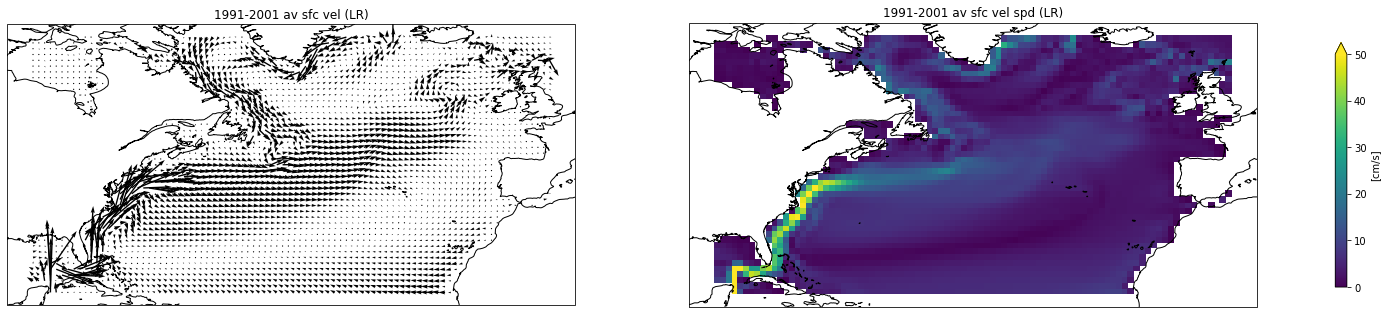

In [6]:
fig = plt.figure(figsize=(28, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(121,projection=pc)
ax1.coastlines()
# ax6.pcolormesh(dssh_rgd_HR.lon, dssh_rgd_HR.lat, dssh_rgd_HR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
Q = ax1.quiver(u1.lon, u1.lat, u1.mean('time'), 
               v1.mean('time'), transform=pc)
ax1.set_title('1991-2001 av sfc vel (LR)')

ax2 = plt.subplot(122,projection=pc)
ax2.coastlines()
subplt2=ax2.pcolormesh(u1.lon, u1.lat, Vspd1, vmin=0, vmax=50,
               transform=pc)
# plot(vmax=50)
ax2.set_title('1991-2001 av sfc vel spd (LR)')

# # Now adding the colorbar
cb = fig.colorbar(subplt2, ax=[ax1,ax2], shrink=0.75,extend='max')
cb.set_label('[cm/s]')

Text(0.5, 1.0, 'sfc vel: 2091-2100 minus 1991-2000 (LR)')

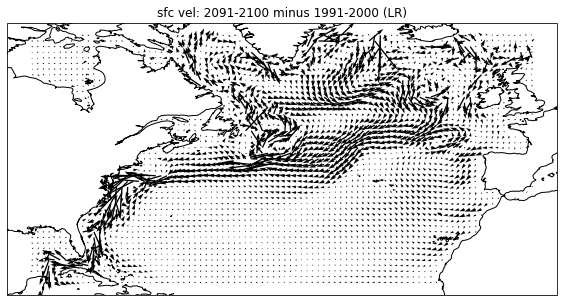

In [7]:
fig = plt.figure(figsize=(10, 5))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(111,projection=pc)
ax1.coastlines()
# ax6.pcolormesh(dssh_rgd_HR.lon, dssh_rgd_HR.lat, dssh_rgd_HR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
Q = ax1.quiver(u1.lon, u1.lat, du, dv, transform=pc)
ax1.set_title('sfc vel: 2091-2100 minus 1991-2000 (LR)')

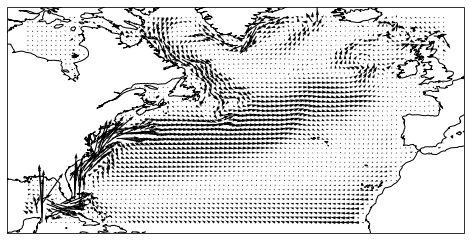

In [8]:
fig = plt.figure(figsize=(18, 10))
pc = cartopy.crs.PlateCarree()
ax6 = plt.subplot(121,projection=pc)
ax6.coastlines()
# ax6.pcolormesh(dssh_rgd_HR.lon, dssh_rgd_HR.lat, dssh_rgd_HR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
Q = ax6.quiver(u1.lon, u1.lat, u1.mean('time'), v1.mean('time'), transform=pc)


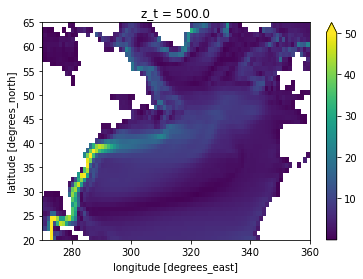

In [9]:
xr.ufuncs.sqrt(u1.mean('time')**2 + v1.mean('time')**2).plot(vmax=50)